In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()


print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [ ]:
x_train = np.squeeze(x_train, axis=-1)
x_test  = np.squeeze(x_test, axis=-1)

In [ ]:
X_valid = x_train[-10000:]
X_train = x_train[:-10000]

In [ ]:
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_shape=(30,)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape((28, 28))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

In [ ]:
stacked_ae.compile(loss='mse', optimizer='nadam')

In [ ]:
history = stacked_ae.fit(X_train, X_train, epochs=15, batch_size=128,
                         validation_data=(X_valid, X_valid))

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0529 - val_loss: 0.0280
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0266 - val_loss: 0.0238
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0234 - val_loss: 0.0221
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0220 - val_loss: 0.0213
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0212 - val_loss: 0.0203
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0204 - val_loss: 0.0197
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0198 - val_loss: 0.0193
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0194 - val_loss: 0.0190
Epoch 9/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0190 - val_loss: 0.0187
Epoch 10/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0186 - val_loss: 0.0183
Epoch 11/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0184 - val_loss: 0.0182
Epoch 12/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/

In [ ]:
n = 10
reconstructed = stacked_ae.predict(x_test[:n])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [ ]:
def plot_recontructions(model, images=X_valid, n_images=n):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap='binary')
        plt.axis('off')
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap='binary')
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


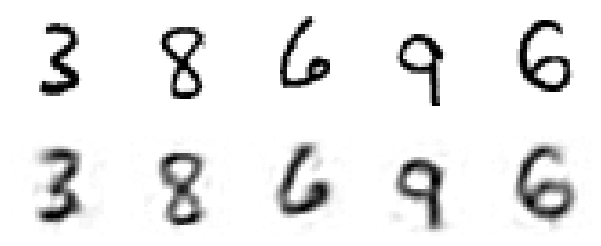

In [ ]:
plot_recontructions(stacked_ae, X_valid, n_images=5)